In [1]:
import numpy as np
import os.path
from scipy import ndimage
from scipy.interpolate import griddata
import itertools
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
from mapping import creategrid as grd
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
import pandas as pd
from eod import msg as msg
pylab.rcParams['figure.figsize'] = 20., 12.
%matplotlib inline
import pyproj
#from mapping import proj

In [2]:
HOD=range(24)   # hours of day
CFAC=-781648343
LFAC=-781648343
COFF=1856
LOFF=1856
YRANGE=range(2004,2014)

tpath= "/users/global/cornkle/data/OBS/TRMM/trmm_swaths_WA/"
tf=msg.extract_TRMMfile(tpath, hod=HOD, yrange=YRANGE)
tf.keys()
print(len(tf['fpath']))

4559


In [11]:
date=tf['date'].get_str([3,4,5])

In [12]:
date

['20040602 13:00:00', '20040602 11:30:00', '20040602 03:30:00']

In [110]:
dmsg, dtrmm=msg.quickreadTrmmMSG(tf, nb=0)

In [111]:
mlat=dmsg['lats']
mlon=dmsg['lons']
md=dmsg['t']
tlat=dtrmm['lats']
tlon=dtrmm['lons']
td=dtrmm['pcp']
mins=tf['tmins']
print td.shape
print md.shape

(1030, 49)
(580, 1640)


<matplotlib.colorbar.Colorbar instance at 0x7fa8ff919ab8>

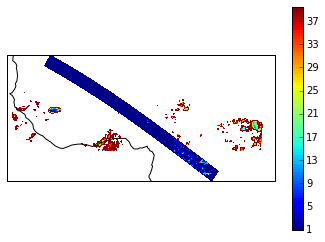

In [115]:
dy1=150
dy2=400
dx1=900
dx2=1100
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(tlon[320:410, :], tlat[320:410, :], td[320:410, :],levels=np.arange(0,30, 0.5), transform=ccrs.PlateCarree())
plt.contourf(mlon[dy1:dy2, dx1:dx2], mlat[dy1:dy2, dx1:dx2], md[dy1:dy2, dx1:dx2], levels=np.arange(-80,-40,1), transform=ccrs.PlateCarree())
plt.contourf(tlon[320:410, :], tlat[320:410, :], td[320:410, :],levels=np.arange(5,40, 0.5), transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
#plt.savefig('/users/global/cornkle/msgbig_t.pdf')

<matplotlib.colorbar.Colorbar instance at 0x7fa904370908>

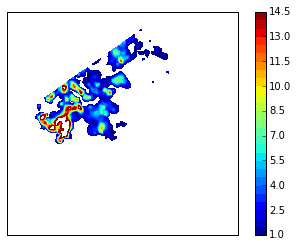

In [74]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(tlon, tlat, td,levels=np.arange(1,15, 0.5), transform=ccrs.PlateCarree()) 
ax.coastlines()
plt.colorbar()

In [142]:
mins=tf['tmins']
minis=np.array(mins)

mask=(minis==0) | (minis==30) 
tnb=np.array(range(len(tf['fpath'])))[mask]
print tnb
print np.array(mins)[mask]

[   7   27   31   34   42   62   66   67   88   92   99  100  103  108  109
  111  116  124  128  129  132  141  142  146  154  158  162  163  167  174
  182  187  192  197  201  210  216  231  236  249  254  256  267  285  298
  301  304  321  334  336  347  349  358  363  371  378  394  399  411  420
  433  436  441  447  449  465  469  474  482  501  512  521  524  547  548
  553  562  566  574  579  583  588  590  597  601  619  623  624  651  660
  667  668  682  684  694  707  710  720  729  737  738  740  741  746  748
  751  768  789  790  799  810  820  822  840  846  854  855  858  881  886
  895  906  908  912  916  920  922  931  940  943  947  951  953  967  971
  979  988  996 1001 1018 1020 1021 1024 1028 1030 1035 1039 1045 1049 1061]
[ 0  0 30  0  0 30  0 30 30 30  0 30  0 30  0  0  0 30  0 30  0  0  0  0  0
 30  0 30  0 30 30 30 30 30 30  0 30  0 30 30  0  0 30 30  0 30 30  0  0  0
  0  0 30 30  0 30 30 30  0 30 30  0 30  0  0 30 30  0  0 30  0  0 30 30  0
 30 30  0 3

In [1]:
tnb=np.array(range(len(tf['fpath'])))
maxs=[]
for tp in tnb:
    dmsg, dtrmm=msg.quickreadTrmmMSG(tf, nb=tp)
    td=dtrmm['pcp'].mean().max()
    maxs.append(td)
sort_max, sort_nbs = zip(*sorted(zip(maxs, tnb), reverse=True))

NameError: name 'np' is not defined

In [157]:
print sort_max[0:10]
print sort_nbs[0:10]

(1.4574619424317103, 0.65031134146780456, 0.6369253931080634, 0.60149659863945171, 0.56668484187567958, 0.56345929254339822, 0.52383658008657841, 0.52154539057002114, 0.51517665729320417, 0.51117386902541595)
(334, 31, 132, 436, 623, 660, 746, 187, 566, 321)


In [158]:
top5=sort_nbs[0:5]
print top5

(334, 31, 132, 436, 623)


In [188]:
NB=top5[3]
mi=tf['tmins'][NB]
dmsg, dtrmm=msg.quickreadTrmmMSG(tf, nb=NB)
mlat=dmsg['lats']
mlon=dmsg['lons']
md=dmsg['t']
tlat=dtrmm['lats']
tlon=dtrmm['lons']
td=dtrmm['pcp']
print mi

0


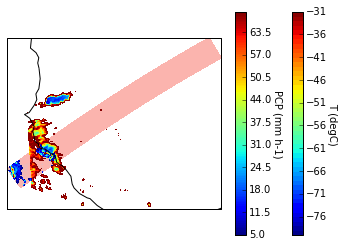

In [189]:
dy1=70
dy2=550
dx1=0
dx2=400
tdy1=0
tdy2=-1

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(0,100, 0.5), transform=ccrs.PlateCarree(), cmap='Pastel1')
plt.contourf(mlon[dy1:dy2, dx1:dx2], mlat[dy1:dy2, dx1:dx2], md[dy1:dy2, dx1:dx2], levels=np.arange(-80,-30,1), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('T (degC)', rotation=270, labelpad=+11)
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(5,70, 0.5), transform=ccrs.PlateCarree())

ax.coastlines()
cbar=plt.colorbar()
cbar.set_label('PCP (mm h-1)', rotation=270, labelpad=+11)
plt.savefig('/users/global/cornkle/'+str(NB)+'_msgtd0_p_'+str(mi)+'.pdf')


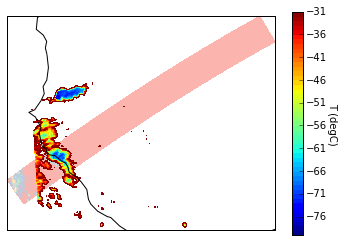

In [190]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(0,100, 0.5), transform=ccrs.PlateCarree(), cmap='Pastel1')
plt.contourf(mlon[dy1:dy2, dx1:dx2], mlat[dy1:dy2, dx1:dx2], md[dy1:dy2, dx1:dx2], levels=np.arange(-80,-30,1), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('T (degC)', rotation=270, labelpad=+11)
ax.coastlines()
plt.savefig('/users/global/cornkle/'+str(NB)+'_msgtd0.pdf')

In [84]:
m = Basemap(width=12000000,height=9000000,projection='mercator',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

array([0, 1, 2, 3, 4, 5])

In [194]:
mercator=pyproj.Proj("+init=EPSG:3857")

In [198]:
x, y=mercator(mlon, mlat)

In [201]:
mlat

array([[  3.94719744,   3.94708943,   3.9469614 , ...,   4.02024937,
          4.02049541,   4.02072763],
       [  3.97467399,   3.97457552,   3.97443843, ...,   4.04824352,
          4.04849911,   4.04873514],
       [  4.00216055,   4.00205374,   4.00191498, ...,   4.07623863,
          4.07649755,   4.07673502],
       ..., 
       [ 20.41603279,  20.41537476,  20.41458893, ...,  20.8565979 ,
         20.85813713,  20.85949516],
       [ 20.44630051,  20.44569588,  20.44486427, ...,  20.8877697 ,
         20.8893261 ,  20.89079285],
       [ 20.47672844,  20.4761219 ,  20.47529411, ...,  20.91907501,
         20.92054749,  20.92202568]], dtype=float32)